In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
#from jupyterthemes import jtplot #for styling matplotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:

train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

#jtplot.style(theme = 'monokai', context = 'notebook', grid = False, ticks = False)


In [5]:

train_data


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
train_data.shape

(31962, 3)

In [8]:
train_data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [9]:
train_data = train_data.drop('id', axis = 1)

train_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


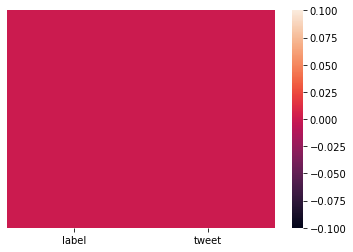

In [10]:
sns.heatmap(train_data.isnull(), yticklabels = False)
plt.show()

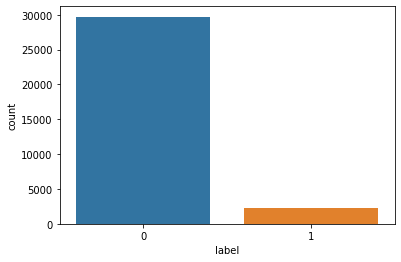

In [11]:

sns.countplot(x = train_data['label'])
plt.show()

In [12]:
len(train_data)

31962

In [13]:
length = list()
for i in range(len(train_data)):
    length.append(len(train_data.iloc[i,1]))

train_data['length'] = length

train_data.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


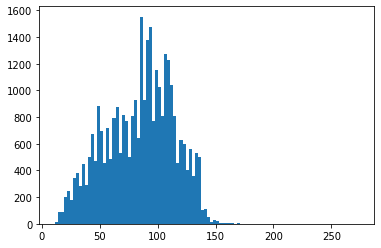

In [14]:
plt.hist(train_data['length'], bins = 100)
plt.show()

In [15]:
train_data.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [16]:

train_data[train_data['length'] == min(train_data['length'])]['tweet'].iloc[0]

train_data[train_data['length'] == max(train_data['length'])]['tweet'].iloc[0]

train_data[train_data['length'] == 84]['tweet'].iloc[0]

positive = train_data[train_data['label'] == 0]

positive.describe()

negative = train_data[train_data['label'] == 1]

negative

negative.describe()


,label,length
count,2242.0,2242.000000
mean,1.0,90.187779
std,0.0,27.375502
min,1.0,12.000000
25%,1.0,69.000000
50%,1.0,96.000000
75%,1.0,111.000000
max,1.0,152.000000


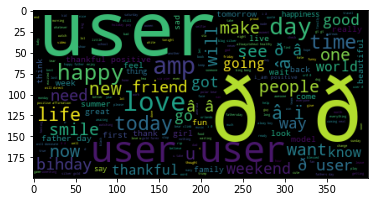

In [17]:
from wordcloud import WordCloud

sentences = train_data['tweet'].tolist()

combined_sentences = " ".join(sentences)
plt.imshow(WordCloud().generate(combined_sentences))
plt.show()

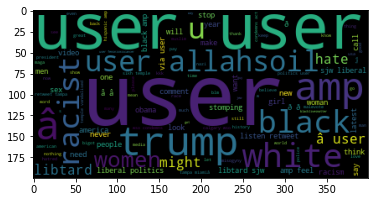

In [18]:
negative_sentences = negative['tweet'].tolist()

combined_negative_sentences = " ".join(negative_sentences)

plt.imshow(WordCloud().generate(combined_negative_sentences))
plt.show()

In [19]:
import string
string.punctuation

import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

st = stopwords.words('english')
st.append("and")

Test = "Goblin and Ninja FoR the win!!"
test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
test_punc_removed = ''.join(test_punc_removed)        

test_punc_removed

test_punc_st_removed = []
for char in test_punc_removed.split():
    if char.lower() not in st:
        test_punc_st_removed.append(char)
test_punc_st_removed = " ".join(test_punc_st_removed)  

test_punc_st_removed

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Goblin Ninja win'

In [20]:
#Tokenization

from sklearn.feature_extraction.text import CountVectorizer

sample_data = ["This is my first paper", "This is the second document", "here is the third thi one"]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(sample_data)

vectorizer.get_feature_names_out()

X.toarray()


array([[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]], dtype=int64)

In [21]:
# Creating a pipeline which removes punctuation, stopwords and peforms tokenization


def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)  
    return test_punc_st_removed

message_cleaning("Goblin and Ninja fOR thE win!!")

train_data_clean = train_data['tweet'].apply(message_cleaning)

train_data['tweet'][5]

train_data_clean[5]

data = train_data_clean.tolist()

tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()

tweets_countvectorizer.shape

X = tweets_countvectorizer
y = train_data['label']

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5940
           1       0.61      0.59      0.60       453

    accuracy                           0.94      6393
   macro avg       0.79      0.78      0.79      6393
weighted avg       0.94      0.94      0.94      6393



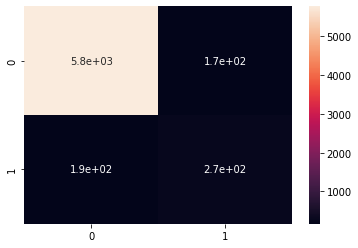

In [22]:

# Using Naive Bayes to classify

X.shape

y.shape

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.naive_bayes import MultinomialNB #for discrete values

NB_classifier = MultinomialNB()

NB_classifier.fit(X_train, y_train)

y_pred = NB_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

sns.heatmap(cm, annot = True)

ac = accuracy_score(y_test, y_pred)
ac

print(classification_report(y_test, y_pred))